original
10.713905909334704
com ruido
150.58740284227395


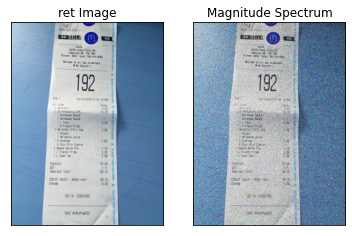

original
33.742120511375305
com ruido
152.2271313289364


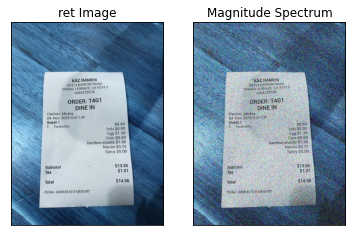

original
14.688042728941381
com ruido
136.1586198630054


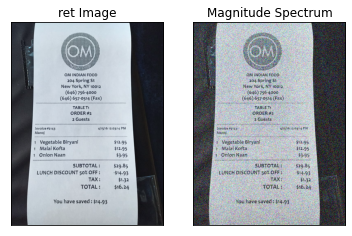

original
13.923715478357625
com ruido
152.07169714425143


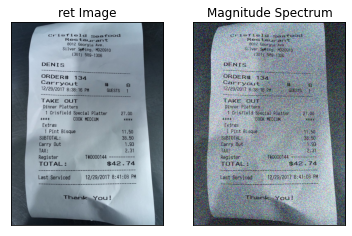

original
6.8019973841888985
com ruido
146.83976909004267


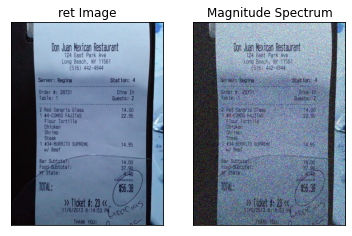

original
20.521957203493677
com ruido
143.81429904673809


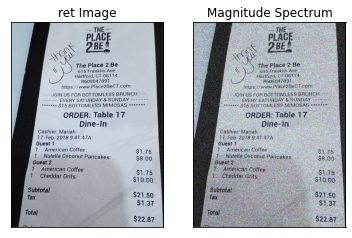

original
20.534680717698606
com ruido
153.92404465996634


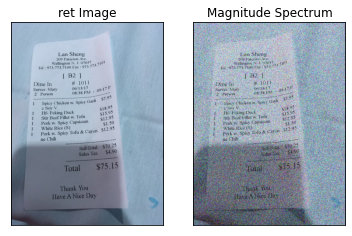

original
15.310099020499983
com ruido
142.1829264208472


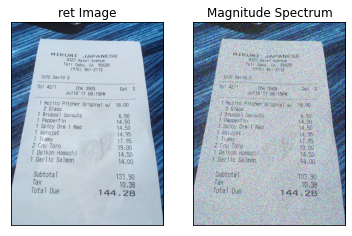

original
20.564123709246413
com ruido
154.37091349658252


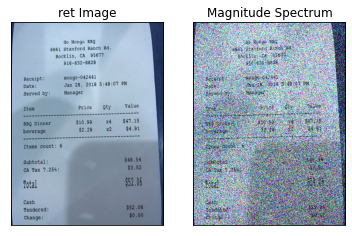

original
19.231436312531383
com ruido
151.78112457615606


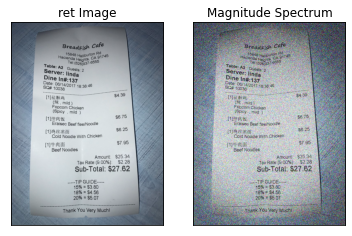

In [167]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
from scipy.signal import convolve2d
import math
from skimage.restoration import estimate_sigma
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from pytesseract import Output

def estimateNoise(img):
    return estimate_sigma(img, multichannel=False, average_sigmas=True)

def estimate_noise(I):
    
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    
    Gx = [[-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]]
    
    Gy = [[-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]]
    
    Image  = cv2.Sobel(src=I, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) #
    
    H, W = Image.shape

    M = [[1, -2, 1],
        [-2, 4, -2],
        [1, -2, 1]]

    sigma = np.sum(np.sum(np.absolute(convolve2d(Image, M))))

    sigma = sigma * (math.sqrt(math.pi/2) * (1 /  (6 * (W-2) * (H-2))))

    return sigma

original = []
noised = []


for i in range(100,110):

    img = cv2.imread('./images/1'+str(i).zfill(3) +'-receipt.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    print("original")
    print(estimate_noise(img))
    
    imgNoise = random_noise(img, mode='gaussian', var=0.1**1)
    imgNoise = (255*imgNoise).astype(np.uint8)
    print("com ruido")
    print(estimate_noise(imgNoise))
    
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('ret Image'), plt.xticks([]), plt.yticks([])

    # plt.subplot(121),plt.imshow(img_gray, cmap = 'gray')
    # plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(imgNoise, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()


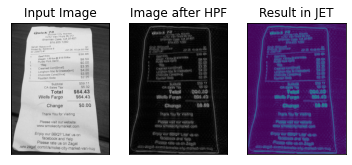

In [11]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()